<a href="https://colab.research.google.com/github/All-Natural/python/blob/master/TimeSeries(1column).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd

# Importing data
df = pd.read_csv('./Bond Index (Edited).csv',header=None)
#df.iloc[:,0] = pd.to_numeric(df.iloc[:,0],errors='coerce') # header become NAN if it is not numeric
#df.dropna(inplace=True) #drop NA if any
#Printing head
df.head()

dataset = pd.DataFrame(df)
print(dataset)
# summary statistics
print(df.describe())
dataset = dataset.interpolate() #index will be created, but no column
df = dataset
print("After interpolation ....")
print(df)

            0
0     2586.25
1         NaN
2         NaN
3     2596.17
4     2600.02
...       ...
1318  3543.66
1319  3550.19
1320  3534.57
1321  3534.48
1322  3546.64

[1323 rows x 1 columns]
                 0
count  1305.000000
mean   2958.939731
std     251.775622
min    2574.380000
25%    2801.530000
50%    2853.890000
75%    3178.150000
max    3550.190000
After interpolation ....
                0
0     2586.250000
1     2589.556667
2     2592.863333
3     2596.170000
4     2600.020000
...           ...
1318  3543.660000
1319  3550.190000
1320  3534.570000
1321  3534.480000
1322  3546.640000

[1323 rows x 1 columns]


In [ ]:
#Printing tail
df.tail()

,0
1318,3543.66
1319,3550.19
1320,3534.57
1321,3534.48
1322,3546.64


In [ ]:
#Subsetting the dataset
#Index 11856 marks the end of year 2013
#df = pd.read_csv('TimeSeriesTrain.csv', nrows = 11856)

#Creating train and test set 
#Index 10392 marks the end of October 2013

n_row = df.shape[0]
train_n_row = int(n_row * 0.8) 
train=df[0:train_n_row] 
test=df[train_n_row:]

df=df.dropna()
train=train.dropna()
test=test.dropna()

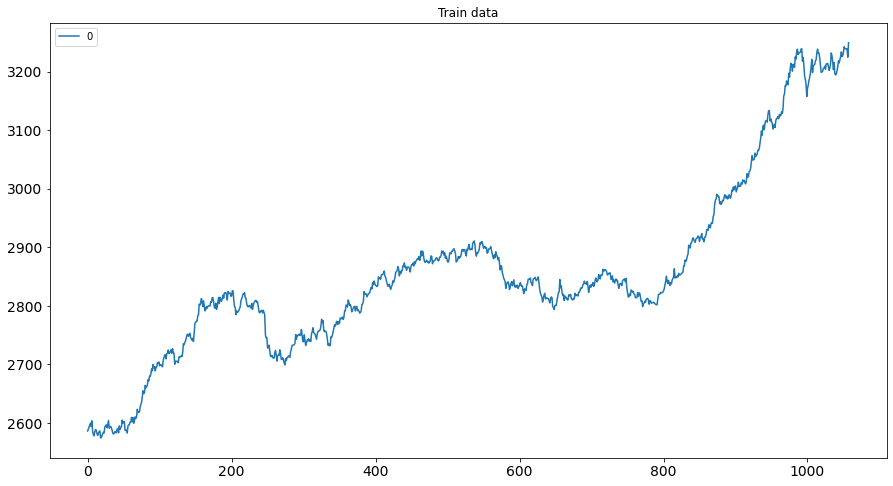

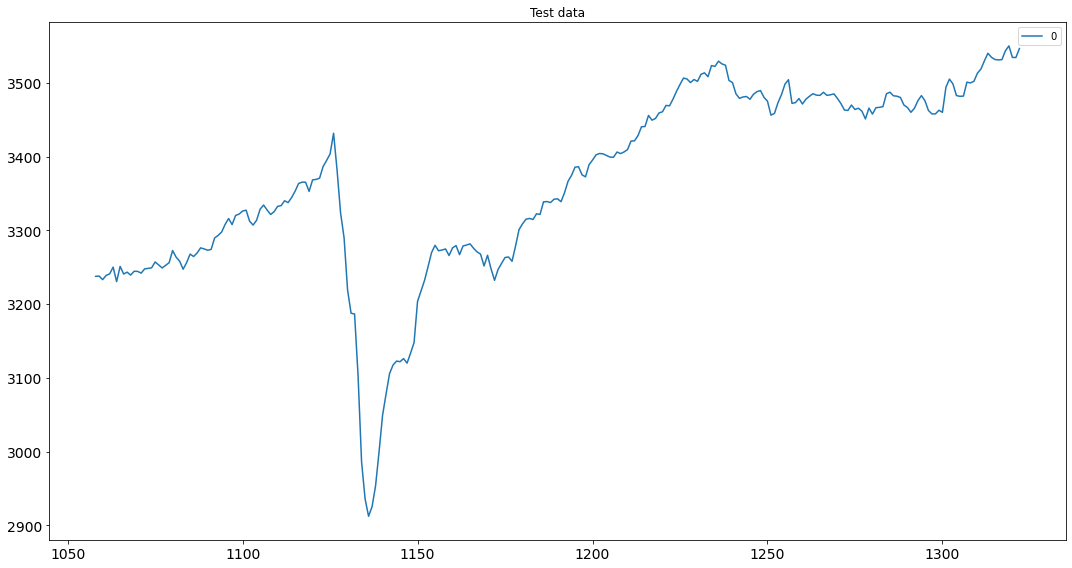

In [ ]:
#Plotting data
train.plot(figsize=(15,8), title= 'Train data', fontsize=14)
test.plot(figsize=(15,8), title= 'Test data', fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller

X = df.iloc[:,0]
X = X.values
print(X)
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1]) # p vlaue > 0.05 means there non-stationary, need to use non stationary model


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[2586.25       2589.55666667 2592.86333333 ... 3534.57       3534.48
 3546.64      ]
ADF Statistic: -0.038930
p-value: 0.955192


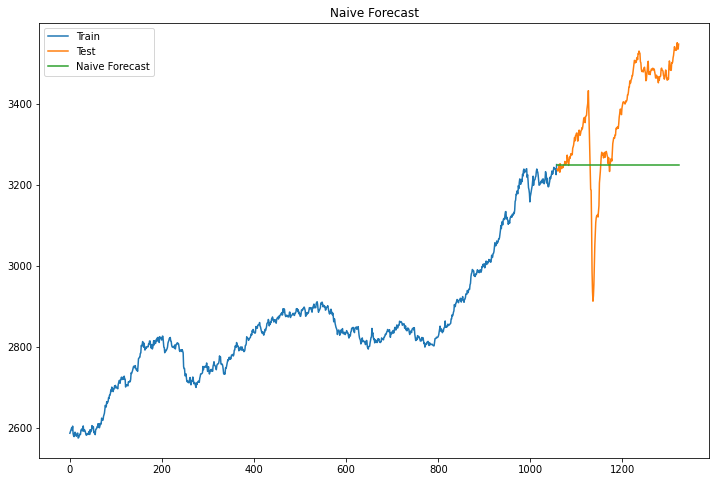

In [ ]:
dd= np.asarray(train.iloc[:,0])
y_hat = test.copy()
y_hat['naive'] = dd[len(dd)-1]
plt.figure(figsize=(12,8))
plt.plot(train.index, train.iloc[:,0], label='Train')
plt.plot(test.index,test.iloc[:,0], label='Test')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test.iloc[:,0], y_hat.naive))
print("Naive Forecast : take last train value (MA1) RMS :", rms)


Naive Forecast : take last train value (MA1) RMS : 172.9574950011577


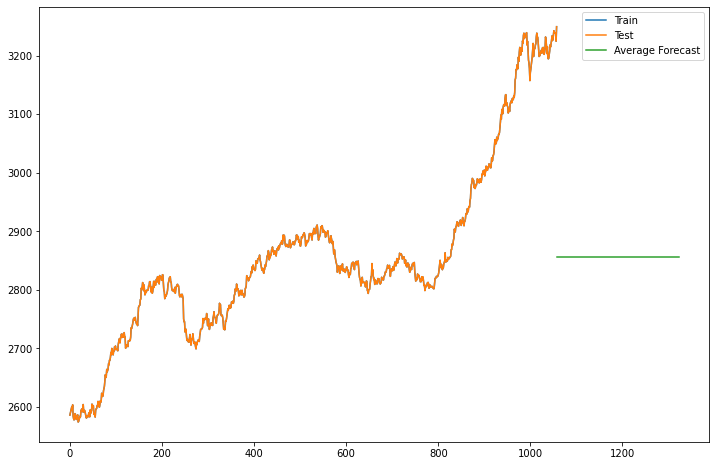

In [ ]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train.iloc[:,0].mean()
plt.figure(figsize=(12,8))
plt.plot(train.iloc[:,0], label='Train')
plt.plot(train.iloc[:,0], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Average Forecast')
plt.legend(loc='best')
plt.show()

In [ ]:
rms = sqrt(mean_squared_error(test, y_hat_avg.avg_forecast))
print("Average : take average of all train value. RMS :", rms)

Average : take average of all train value. RMS : 525.0448396412609


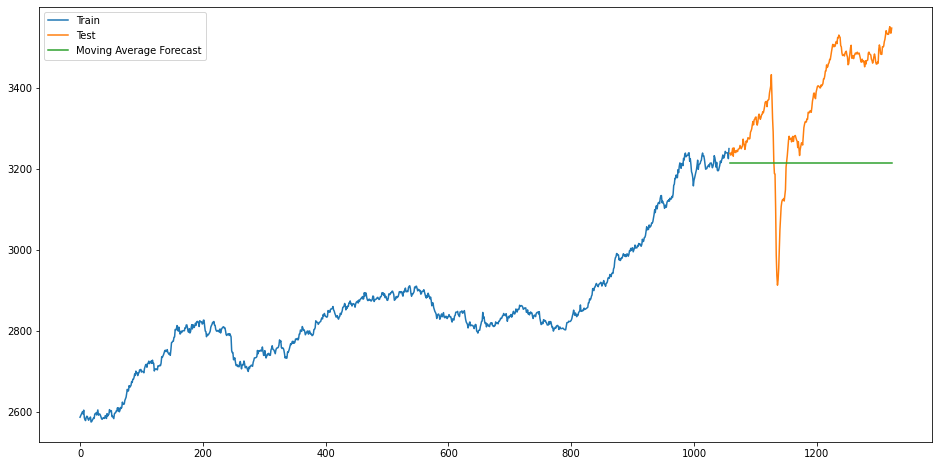

In [ ]:
y_hat_avg = test.copy()
y_hat_avg['moving_avg_forecast'] = train.iloc[:,0].rolling(60).mean().iloc[-1]
plt.figure(figsize=(16,8))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast')
plt.legend(loc='best')
plt.show()

In [ ]:
rms = sqrt(mean_squared_error(test, y_hat_avg.moving_avg_forecast))
print("MA RMS :", rms)

MA RMS : 199.1146428742996


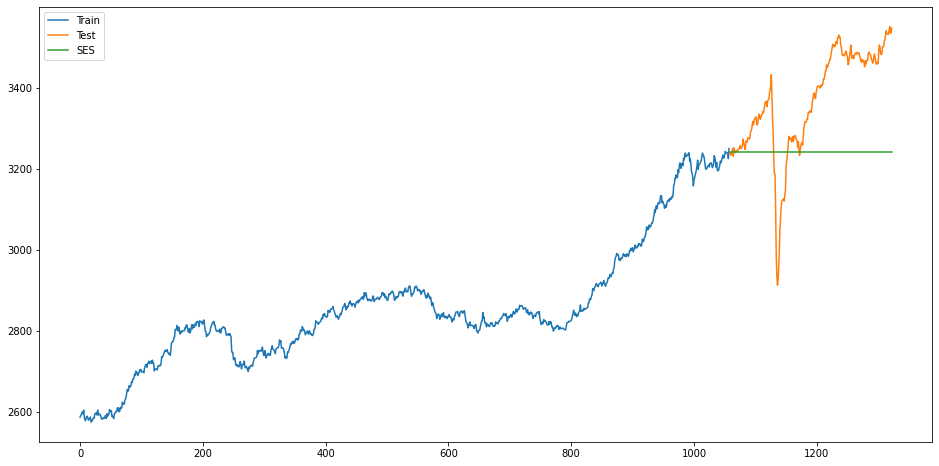

In [ ]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
y_hat_avg = test.copy()
fit2 = SimpleExpSmoothing(np.asarray(train.iloc[:,0])).fit(smoothing_level=0.6,optimized=False)
y_hat_avg['SES'] = fit2.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')
plt.show()


In [ ]:
rms = sqrt(mean_squared_error(test, y_hat_avg.SES))
print("Exponentical Smoothing : RMS :", rms)

Exponentical Smoothing : RMS : 178.14364086577876


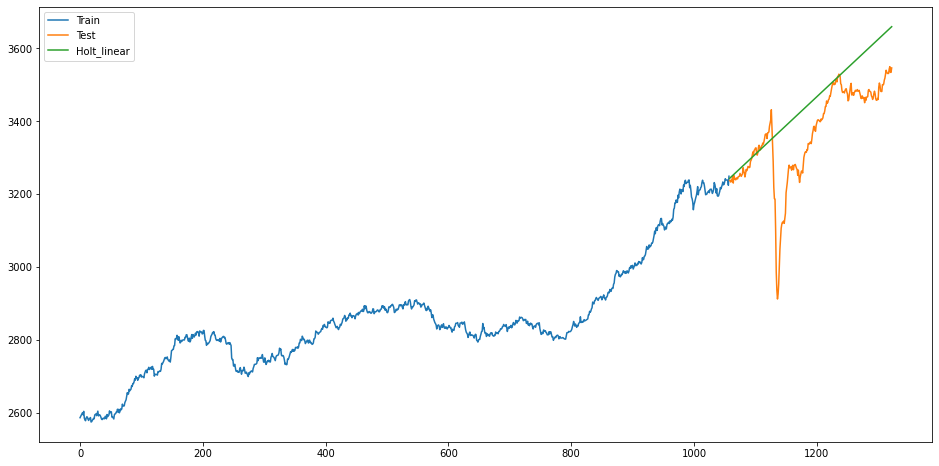

In [ ]:
y_hat_avg = test.copy()

fit1 = Holt(np.asarray(train.iloc[:,0])).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
y_hat_avg['Holt_linear'] = fit1.forecast(len(test))

plt.figure(figsize=(16,8))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.show()

In [ ]:
rms = sqrt(mean_squared_error(test, y_hat_avg.Holt_linear))
print("Holt RMS :", rms)

Holt RMS : 122.88063634941822


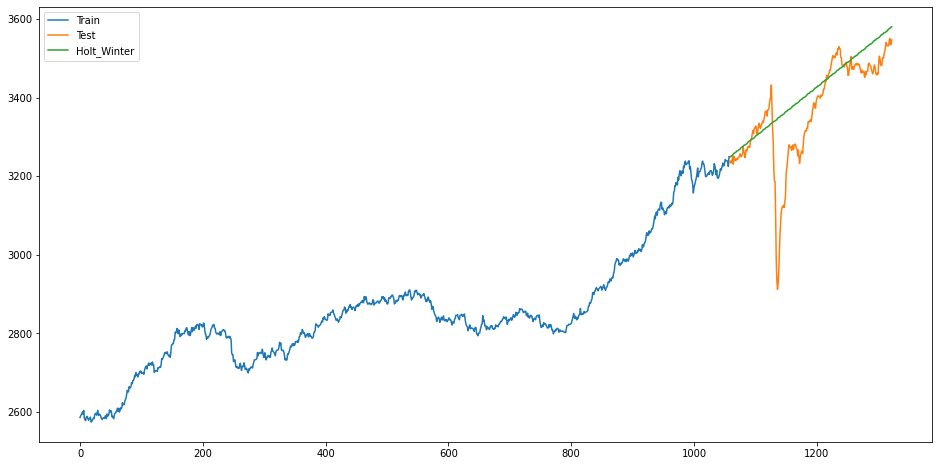

In [ ]:
y_hat_avg = test.copy()
fit1 = ExponentialSmoothing(np.asarray(train.iloc[:,0]) ,seasonal_periods=12 ,trend='add', seasonal='multiplicative',).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot( train, label='Train')
plt.plot(test, label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [ ]:
rms = sqrt(mean_squared_error(test, y_hat_avg.Holt_Winter))
print("Holt Winter RMS :", rms)

Holt Winter RMS : 97.15221983689818


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


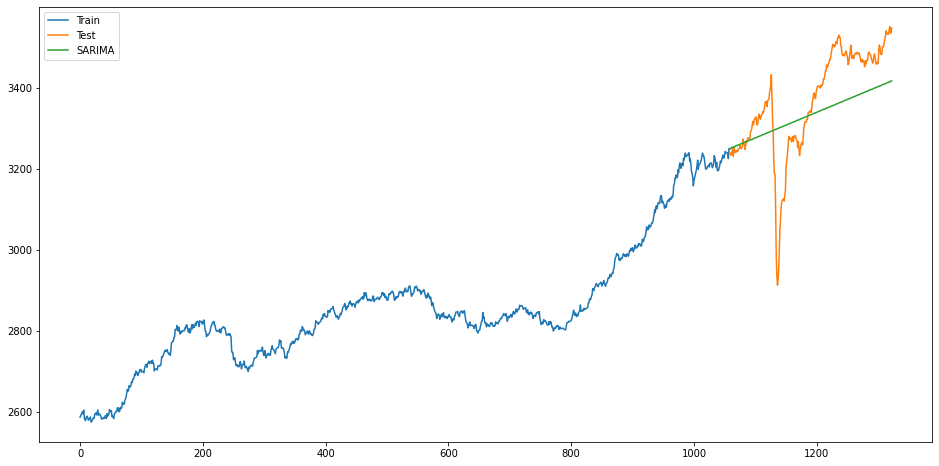

In [ ]:
import statsmodels.api as sm

y_hat_avg = test.copy()
fit1 = sm.tsa.statespace.SARIMAX(train.iloc[-2000:,0], order=(2, 1, 4),seasonal_order=(0,1,1,7)).fit()
y_hat_avg['SARIMA'] = fit1.forecast(len(test))
#y_hat_avg['SARIMA'] = fit1.predict(start="2013-11-1", end="2013-12-31", dynamic=True)
plt.figure(figsize=(16,8))
plt.plot( train, label='Train')
plt.plot(test, label='Test')
plt.plot(y_hat_avg['SARIMA'], label='SARIMA')
plt.legend(loc='best')
plt.show()

In [ ]:

index = y_hat_avg.isna().any(axis=1)
rms = sqrt(mean_squared_error(y_hat_avg.loc[index==False,0], y_hat_avg.SARIMA.dropna()))
print("SARIME RMS :", rms)

SARIME RMS : 102.3895094478116
